In [25]:
#Generates network connections within L23 (stored in ../build/FOLDERNAME/target_xxx_yyy.dat)
foldername = 'connections1' #to save connections to
neuron_file = 'neuron_list1' #to load neuron data from (needs to be computed beforehand!)

#connectivity (EE, EI, IE, II)
p0 = [1.0, 1.0, 1.0, 1.0]
lmbda = [200., 200., 100., 100.]

#synapses
num_syn_EE = [10, 50] #uniformly distributed
num_syn_EI = [10, 50] #uniformly distributed
num_syn_IE = [200, 300] #uniformly distributed
num_syn_II = [200, 300] #uniformly distributed

In [26]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
#load neuron list
nrn_list = pd.DataFrame.from_csv('../build/' + neuron_file + '.csv', sep=' ')
idx_E = np.where(nrn_list.type=='LIF_exc')[0]
idx_I = np.where(nrn_list.type=='LIF_inh')[0]
nrn_list.head()

,type,x,y,z,tuning,morphology,cell_par
index,,,,,,,
0,LIF_exc,-213.667,578.490,-6.572,None,None,None
1,LIF_exc,677.089,617.884,-16.595,None,None,None
2,LIF_exc,96.879,-863.536,39.966,None,None,None
3,LIF_exc,559.983,741.936,22.841,None,None,None
4,LIF_exc,770.114,-166.903,32.458,None,None,None


In [28]:
#distance-dependent connection probability
p_dist_EE = lambda d: p0[0]*np.exp(-d/lmbda[0]) #distance-dependent connection probability
p_dist_EI = lambda d: p0[1]*np.exp(-d/lmbda[1]) #distance-dependent connection probability
p_dist_IE = lambda d: p0[2]*np.exp(-d/lmbda[2]) #distance-dependent connection probability
p_dist_II = lambda d: p0[3]*np.exp(-d/lmbda[3]) #distance-dependent connection probability

In [29]:
#generate connections
d_EE = [] #connection distances
d_EI = [] #connection distances
d_IE = [] #connection distances
d_II = [] #connection distances
s_EE = [] #synapses per connection
s_EI = [] #synapses per connection
s_IE = [] #synapses per connection
s_II = [] #synapses per connection

col_tgt = []
col_src = []
col_N = []

In [30]:
#EE
for tgt in idx_E:
    tgt_pos = np.array([nrn_list.x[tgt], nrn_list.y[tgt], nrn_list.z[tgt]])
    for src in idx_E:
        if src==tgt:
            continue #no autapses
        src_pos = np.array([nrn_list.x[src], nrn_list.y[src], nrn_list.z[src]])
        d = np.sqrt(np.sum((tgt_pos-src_pos)**2)) #Euclidean distance
        if np.random.rand()<p_dist_EE(d):
            d_EE.append(d)
            col_tgt.append(tgt)
            col_src.append(src)
            n_syn = np.random.randint(num_syn_EE[0], num_syn_EE[1]+1)
            s_EE.append(n_syn)
            col_N.append(n_syn)

In [31]:
#EI
for tgt in idx_E:
    tgt_pos = np.array([nrn_list.x[tgt], nrn_list.y[tgt], nrn_list.z[tgt]])
    for src in idx_I:
        src_pos = np.array([nrn_list.x[src], nrn_list.y[src], nrn_list.z[src]])
        d = np.sqrt(np.sum((tgt_pos-src_pos)**2)) #Euclidean distance
        if np.random.rand()<p_dist_EI(d):
            d_EI.append(d)
            col_tgt.append(tgt)
            col_src.append(src)
            n_syn = np.random.randint(num_syn_EI[0], num_syn_EI[1]+1)
            s_EI.append(n_syn)
            col_N.append(n_syn)

In [32]:
#IE
for tgt in idx_I:
    tgt_pos = np.array([nrn_list.x[tgt], nrn_list.y[tgt], nrn_list.z[tgt]])
    for src in idx_E:
        src_pos = np.array([nrn_list.x[src], nrn_list.y[src], nrn_list.z[src]])
        d = np.sqrt(np.sum((tgt_pos-src_pos)**2)) #Euclidean distance
        if np.random.rand()<p_dist_IE(d):
            d_IE.append(d)
            col_tgt.append(tgt)
            col_src.append(src)
            n_syn = np.random.randint(num_syn_IE[0], num_syn_IE[1]+1)
            s_IE.append(n_syn)
            col_N.append(n_syn)

In [33]:
#II
for tgt in idx_I:
    tgt_pos = np.array([nrn_list.x[tgt], nrn_list.y[tgt], nrn_list.z[tgt]])
    for src in idx_I:
        if src==tgt:
            continue #no autapses
        src_pos = np.array([nrn_list.x[src], nrn_list.y[src], nrn_list.z[src]])
        d = np.sqrt(np.sum((tgt_pos-src_pos)**2)) #Euclidean distance
        if np.random.rand()<p_dist_II(d):
            d_II.append(d)
            col_tgt.append(tgt)
            col_src.append(src)
            n_syn = np.random.randint(num_syn_II[0], num_syn_II[1]+1)
            s_II.append(n_syn)
            col_N.append(n_syn)

In [34]:
p_EE = 1.*len(d_EE)/(len(idx_E)*len(idx_E))
p_EI = 1.*len(d_EI)/(len(idx_E)*len(idx_I))
p_IE = 1.*len(d_IE)/(len(idx_I)*len(idx_E))
p_II = 1.*len(d_II)/(len(idx_I)*len(idx_I))
print('L23-EE: p=%.2f%%, %.2f synapses per connection'%(100.*p_EE, np.mean(s_EE)))
print('L23-EI: p=%.2f%%, %.2f synapses per connection'%(100.*p_EI, np.mean(s_EI)))
print('L23-IE: p=%.2f%%, %.2f synapses per connection'%(100.*p_IE, np.mean(s_IE)))
print('L23-II: p=%.2f%%, %.2f synapses per connection'%(100.*p_II, np.mean(s_II)))

L23-EE: p=4.65%, 29.85 synapses per connection
L23-EI: p=4.72%, 29.84 synapses per connection
L23-IE: p=1.26%, 250.23 synapses per connection
L23-II: p=1.53%, 249.32 synapses per connection


In [35]:
if not os.path.exists('../build/' + foldername):
    os.mkdir('../build/' + foldername)

In [36]:
#save data (.dat files with 100 target ids each)
for n_step in range(0, max(col_tgt), 100):
    tgt_sel = np.logical_and(np.array(col_tgt)>=n_step, np.array(col_tgt)<(n_step+100))
    conn_dict = {'tgt': np.array(col_tgt)[tgt_sel], 'src': np.array(col_src)[tgt_sel], 'N_syn': np.array(col_N)[tgt_sel]}
    conn_list = pd.DataFrame(conn_dict, columns=['tgt', 'src', 'N_syn'])
    conn_list.to_csv('../build/' + foldername + '/target_%d_%d.dat'%(n_step, n_step+100), sep=' ', index=False, header=False)
conn_list.head()

,tgt,src,N_syn
0,400,32,261
1,400,133,252
2,400,154,244
3,400,196,283
4,400,205,250


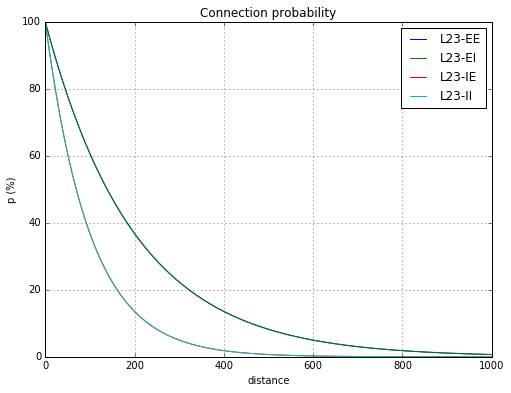

In [37]:
#plot connectivity profiles
d_axis = np.arange(0, 1000)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(d_axis, 100.*p_dist_EE(d_axis), label='L23-EE')
ax.plot(d_axis, 100.*p_dist_EI(d_axis), label='L23-EI')
ax.plot(d_axis, 100.*p_dist_IE(d_axis), label='L23-IE')
ax.plot(d_axis, 100.*p_dist_II(d_axis), label='L23-II')
ax.set_xlabel('distance')
ax.set_ylabel('p (%)')
ax.set_title('Connection probability')
ax.grid(True)
ax.legend()
fig.savefig('../build/' + foldername + '/prob.png', dpi=600)

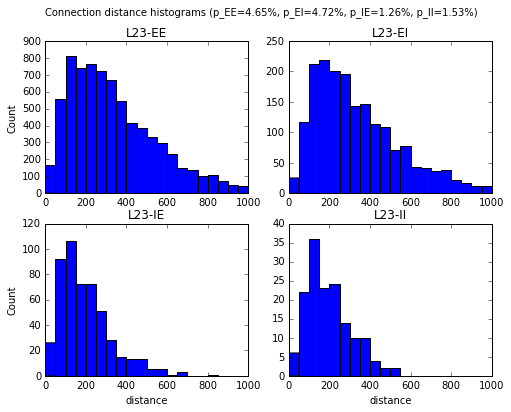

In [38]:
#plot histograms
n_bins = np.arange(0, 1001, 50)
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
ax[0, 0].hist(d_EE, n_bins)
ax[0, 0].set_ylabel('Count')
ax[0, 0].set_title('L23-EE')
ax[0, 1].hist(d_EI, n_bins)
ax[0, 1].set_title('L23-EI')
ax[1, 0].hist(d_IE, n_bins)
ax[1, 0].set_xlabel('distance')
ax[1, 0].set_ylabel('Count')
ax[1, 0].set_title('L23-IE')
ax[1, 1].hist(d_II, n_bins)
ax[1, 1].set_xlabel('distance')
ax[1, 1].set_title('L23-II')
fig.suptitle('Connection distance histograms (p_EE=%.2f%%, p_EI=%.2f%%, p_IE=%.2f%%, p_II=%.2f%%)'%(100.*p_EE, 100.*p_EI, 100.*p_IE, 100.*p_II))
fig.savefig('../build/' + foldername + '/disthist.png', dpi=600)

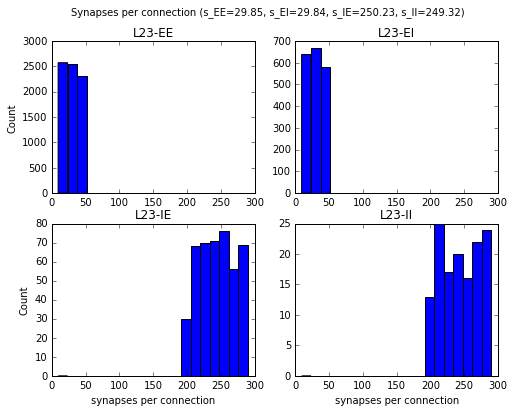

In [39]:
#plot number of synapses histograms
n_bins = np.arange(np.min([num_syn_EE, num_syn_EI, num_syn_IE, num_syn_II]), np.max([num_syn_EE, num_syn_EI, num_syn_IE, num_syn_II])+2, max(1, np.round(0.05*np.diff([np.min([num_syn_EE, num_syn_EI, num_syn_IE, num_syn_II]), np.max([num_syn_EE, num_syn_EI, num_syn_IE, num_syn_II])]))))-0.5
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
ax[0, 0].hist(s_EE, n_bins)
ax[0, 0].set_ylabel('Count')
ax[0, 0].set_title('L23-EE')
ax[0, 1].hist(s_EI, n_bins)
ax[0, 1].set_title('L23-EI')
ax[1, 0].hist(s_IE, n_bins)
ax[1, 0].set_xlabel('synapses per connection')
ax[1, 0].set_ylabel('Count')
ax[1, 0].set_title('L23-IE')
ax[1, 1].hist(s_II, n_bins)
ax[1, 1].set_xlabel('synapses per connection')
ax[1, 1].set_title('L23-II')
fig.suptitle('Synapses per connection (s_EE=%.2f, s_EI=%.2f, s_IE=%.2f, s_II=%.2f)'%(np.mean(s_EE), np.mean(s_EI), np.mean(s_IE), np.mean(s_II)))
fig.savefig('../build/' + foldername + '/synhist.png', dpi=600)